# Problem - Machine Learning Challenge #1 https://www.hackerearth.com/challenge/competitive/machine-learning-challenge-one/problems/


# Rank 19 Solution

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

/home/aditya/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('1st_data/train_indessa.csv')
test = pd.read_csv('1st_data/test_indessa.csv')

In [3]:
train.head()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350,36 months,,19.19,E,E3,clerk,...,0,74,INDIVIDUAL,NaN,26th week,0,0,28699,30800,0
1,70011223,4800,4800,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0,NaN,INDIVIDUAL,NaN,9th week,0,0,9974,32900,0
2,70255675,10000,10000,10000,36 months,BAT1586599,7.26,A,A4,Driver,...,0,NaN,INDIVIDUAL,NaN,9th week,0,65,38295,34900,0
3,1893936,15000,15000,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0,NaN,INDIVIDUAL,NaN,135th week,0,0,55564,24700,0
4,7652106,16000,16000,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0,NaN,INDIVIDUAL,NaN,96th week,0,0,47159,47033,0


In [4]:
train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,532428.000000,532428.000000,532428.000000,532428.000000,532428.000000,532425.000000,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,490424.000000,490424.000000,532428.000000
mean,35005472.347129,14757.595722,14744.271291,14704.926696,13.242969,75029.843289,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,139554.110792,32080.572919,0.236327
std,24121476.515915,8434.420080,8429.139277,8441.290381,4.379611,65199.845014,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,153914.877437,38053.035312,0.424826
min,70473.000000,500.000000,500.000000,0.000000,5.320000,1200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10866882.500000,8000.000000,8000.000000,8000.000000,9.990000,45000.000000,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,29839.750000,14000.000000,0.000000
50%,37095895.000000,13000.000000,13000.000000,13000.000000,12.990000,65000.000000,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,80669.500000,23700.000000,0.000000
75%,58489200.750000,20000.000000,20000.000000,20000.000000,16.200000,90000.000000,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,208479.250000,39800.000000,0.000000
max,73544841.000000,35000.000000,35000.000000,35000.000000,28.990000,9500000.000000,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8000078.000000,9999999.000000,1.000000


In [5]:
print train.shape
print test.shape

(532428, 45)
(354951, 44)


In [6]:
# finding which columns have missing values
train.columns[pd.isnull(train).sum() > 0].tolist()

['batch_enrolled',
 'emp_title',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [7]:
loan_stat = train['loan_status']
train = train.drop('loan_status', axis=1)

# filling empty entries with 0,
# we can use column mean/median also
train = train.fillna(0)
test = test.fillna(0)

In [8]:
# Label Encoding 

In [9]:
features = list(train.columns[:])

## Feature Engineering


In [10]:
corr = train.corr()

In [11]:
corr

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
member_id,1.000000,0.065607,0.067888,0.073426,-0.141030,0.034658,0.134179,0.049970,-0.127609,0.047621,...,-0.461192,-0.075700,-0.113868,-0.072498,0.051465,0.118046,0.017609,0.036940,0.107946,0.135679
loan_amnt,0.065607,1.000000,0.999276,0.997124,0.145037,0.330659,0.041866,-0.000441,-0.033666,-0.030083,...,0.532580,0.031374,0.073326,0.052995,-0.014801,-0.058135,0.003198,-0.016197,0.329681,0.310667
funded_amnt,0.067888,0.999276,1.000000,0.998041,0.145222,0.330498,0.042699,-0.000157,-0.034270,-0.029706,...,0.531616,0.031022,0.072895,0.052797,-0.014640,-0.057385,0.003300,-0.016041,0.331215,0.312101
funded_amnt_inv,0.073426,0.997124,0.998041,1.000000,0.145251,0.329500,0.044952,0.000298,-0.038342,-0.029038,...,0.529116,0.027770,0.071242,0.050261,-0.014206,-0.055323,0.003476,-0.015603,0.333937,0.314647
int_rate,-0.141030,0.145037,0.145222,0.145251,1.000000,-0.072053,0.163206,0.056775,0.228609,0.044881,...,0.445634,0.056141,0.107292,0.071187,0.013931,0.063466,0.026985,0.004010,-0.074599,-0.144150
annual_inc,0.034658,0.330659,0.330498,0.329500,-0.072053,1.000000,-0.175851,0.047877,0.033434,0.014446,...,0.127485,0.013255,0.007191,0.006332,-0.003959,0.005981,0.014907,0.001081,0.400595,0.259085
dti,0.134179,0.041866,0.042699,0.044952,0.163206,-0.175851,1.000000,-0.007149,-0.016001,-0.016470,...,0.018475,-0.011336,0.002544,0.003708,0.001052,-0.019320,0.007269,-0.011767,0.019115,0.093983
delinq_2yrs,0.049970,-0.000441,-0.000157,0.000298,0.056775,0.047877,-0.007149,1.000000,0.021709,-0.075290,...,0.002817,0.017482,-0.000482,-0.000010,0.063425,0.047501,0.133392,0.003379,0.076322,-0.025591
inq_last_6mths,-0.127609,-0.033666,-0.034270,-0.038342,0.228609,0.033434,-0.016001,0.021709,1.000000,0.031788,...,0.087700,0.033606,0.045254,0.033200,0.006981,0.058014,-0.003680,0.010235,0.009706,-0.013140
mths_since_last_delinq,0.047621,-0.030083,-0.029706,-0.029038,0.044881,0.014446,-0.016470,-0.075290,0.031788,1.000000,...,-0.019372,-0.000130,-0.004201,-0.002458,0.017614,0.530994,-0.043106,0.065935,0.007213,-0.060536


In [12]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    
    width = 80
    height = 80
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 60)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Bank Data Feature Correlation')
    labels=features
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.9,-.5,-.4,.1,.2,.3,.4,.5,.75,.8,.85,.90,.95,1])
    plt.show()

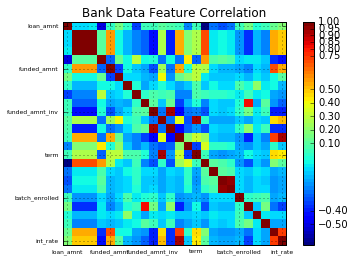

In [13]:
correlation_matrix(corr)
#improvement in plotting needed
#removing "funded_amnt","funded_amnt_inv",
# "collection_recovery_fee" through reduced features

In [14]:
print train['term']
print train['last_week_pay']

0         36 months
1         36 months
2         36 months
3         36 months
4         36 months
5         36 months
6         36 months
7         36 months
8         36 months
9         60 months
10        36 months
11        36 months
12        36 months
13        36 months
14        36 months
15        36 months
16        60 months
17        36 months
18        36 months
19        36 months
20        60 months
21        36 months
22        36 months
23        36 months
24        36 months
25        60 months
26        36 months
27        36 months
28        36 months
29        36 months
            ...    
532398    36 months
532399    36 months
532400    36 months
532401    36 months
532402    36 months
532403    60 months
532404    36 months
532405    60 months
532406    36 months
532407    36 months
532408    36 months
532409    36 months
532410    36 months
532411    36 months
532412    36 months
532413    60 months
532414    36 months
532415    36 months
532416    36 months


In [15]:
# converting both features to integers
train['term'] = train['term'].str.extract('(\d+)')
train['term'] = train['term'].fillna("0")
train['term'] = train['term'].astype(int)

train['last_week_pay'] = train['last_week_pay'].str.extract('(\d+)')
train['last_week_pay'] = train['last_week_pay'].fillna("0")
train['last_week_pay'] = train['last_week_pay'].astype(int)

In [16]:
#similar for test
test['last_week_pay'] = test['last_week_pay'].str.extract('(\d+)')
test['term'] = test['term'].str.extract('(\d+)')
test = test.fillna("0")
test['last_week_pay'] = test['last_week_pay'].astype(int)
test['term'] = test['term'].astype(int)

In [17]:
train.head()['emp_length']
#this also can be fixed but leaving for now as LabelEncoder
# will take care

0      9 years
1     < 1 year
2      2 years
3    10+ years
4    10+ years
Name: emp_length, dtype: object

### NLP features can be extracted from description but leaving for LabelEncoder

In [18]:
train['annual_inc'] = train['annual_inc'].replace(['0'], 0)
test['annual_inc'] = test['annual_inc'].replace(['0'], 0)

In [19]:
### Checking skewness of data

In [20]:
skew_train = []
skew_test = []

In [21]:
for col in train._get_numeric_data().columns:
    skew = train[col].skew()
#     print col,skew
    if skew > 2:
        skew_train.append(col)
        print col,skew
        
print skew_train

annual_inc 44.77585173
delinq_2yrs 5.37339012966
inq_last_6mths 2.03437487492
mths_since_last_record 2.47167401839
pub_rec 15.318404464
revol_bal 15.9802119718
total_rec_int 2.83320485361
total_rec_late_fee 17.6858352229
recoveries 18.0760040671
collection_recovery_fee 30.8382607126
collections_12_mths_ex_med 15.7619463057
acc_now_delinq 27.6408265986
tot_coll_amt 64.1642427614
tot_cur_bal 3.01231504501
total_rev_hi_lim 74.4472076819
['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_record', 'pub_rec', 'revol_bal', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [22]:
for col in test._get_numeric_data().columns:
    skew = test[col].skew()
    print col,skew
    if skew > 2:
        skew_test.append(col)
#         print col,skew
        
print skew_test

member_id 0.0174771355236
loan_amnt 0.682350679
funded_amnt 0.684389390829
funded_amnt_inv 0.681497114492
term 0.870919233544
int_rate 0.431008707392
annual_inc 43.9892213291
dti 351.386447215
delinq_2yrs 5.62160352609
inq_last_6mths 2.21837532999
mths_since_last_delinq 1.23464219544
mths_since_last_record 2.46503375003
open_acc 1.24575817125
pub_rec 10.1073258808
revol_bal 15.9030566175
revol_util -0.178027882831
total_acc 0.891229201662
total_rec_int 2.81551086916
total_rec_late_fee 16.9785808279
recoveries 18.0407074647
collection_recovery_fee 27.8823854711
collections_12_mths_ex_med 19.721879908
mths_since_last_major_derog 1.94618752923
last_week_pay 1.01562076939
acc_now_delinq 17.8004752947
tot_coll_amt 582.954530069
tot_cur_bal 2.78913127095
total_rev_hi_lim 62.7880217394
['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_record', 'pub_rec', 'revol_bal', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_m

In [23]:
for col in skew_train:
    train[col] = np.log(train[col]+10)

# Now check skewness again
for col in train._get_numeric_data().columns:
    skew = train[col].skew()
    if skew > 2:
        print col,skew
        

delinq_2yrs 3.88028746664
mths_since_last_record 2.08670439377
pub_rec 4.54821712482
total_rec_late_fee 9.6136246671
recoveries 6.36634559293
collection_recovery_fee 9.31634619161
collections_12_mths_ex_med 11.6337779858
acc_now_delinq 20.1904198998
tot_coll_amt 2.84384224997


In [24]:
# similar for test
for col in skew_test:
    test[col] = np.log(test[col]+10)
    
for col in test._get_numeric_data().columns:
    skew = test[col].skew()
    if skew > 2:
        print col,skew

delinq_2yrs 3.92791921033
mths_since_last_record 2.08011768607
pub_rec 4.5012821501
total_rec_late_fee 9.5125504778
recoveries 6.2997389693
collection_recovery_fee 9.16057046348
collections_12_mths_ex_med 12.2079845197
acc_now_delinq 16.9579027699
tot_coll_amt 2.83300354097


In [25]:
for col in test._get_numeric_data().columns:
    skew = test[col].skew()
    if skew < -2:
        print col,skew

tot_cur_bal -2.11826756831
total_rev_hi_lim -2.46785342904


In [26]:
print train.dti.skew()
print test.dti.skew()

1.28974001989
-0.407974444858


In [27]:
train['dti'] = np.log10(train['dti']+10)
test['dti'] =  np.log10(test['dti']+10)

In [28]:
#dropping some columns 
dropped = ['pymnt_plan','verification_status_joint',
          'application_type',
]

In [29]:
train = train.drop(labels=dropped,axis=1)
test = test.drop(labels=dropped,axis=1)
#OHE remaining
#Label Encoding remaining
print (train.shape)
print (test.shape)

(532428, 41)
(354951, 41)


In [30]:
# train.to_csv('1st_data/train_cleaned.csv',header=True,index=False)
# test.to_csv('1st_data/test_cleaned.csv',header=True,index=False)
# loan_stat.to_csv('1st_data/labels_train.csv',header=True,index=False)

## New Features

In [31]:
#creating new features
train['new_var_2'] = np.log(train['annual_inc']*1.0/train['loan_amnt'])
test['new_var_2'] = np.log(test['annual_inc']*1.0/test['loan_amnt'])

train['new_var_3'] = np.log(train.total_rec_int + train.total_rec_int)
test['new_var_3'] = np.log(test.total_rec_int + test.total_rec_int)

In [32]:
print (train.shape, test.shape)

((532428, 43), (354951, 43))


In [33]:
train['new_var_4'] = np.sqrt(train.loan_amnt * train.int_rate)
test['new_var_4'] = np.sqrt(test.loan_amnt * test.int_rate)

In [ ]:
#Label Encoding
# desc feature takes more memory since it has high unique values
features = list(train.columns[:])
print ('Total features ',len(features))

for f in train.columns:
    
    if train[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))


print ('Total features ',len(features))

In [ ]:
# found from training xgboost model and taking top features based 
# on feat_importances
reduced_features = [ 'member_id',# 'initial_list_status',
#  'mths_since_last_major_derog',#  'addr_state',
#  'tot_coll_amt',#  'mths_since_last_record',
 'funded_amnt', 'inq_last_6mths', 'emp_length', 'open_acc', 'zip_code',
                    'mths_since_last_delinq',
 'verification_status', 'purpose', 'funded_amnt_inv', 'grade',
                    'revol_bal', 'loan_amnt',
 'emp_title', 'total_acc', 'total_rec_late_fee', 'term',
 'annual_inc', 'total_rev_hi_lim', 'desc', 'recoveries', 'revol_util',
 'dti', 'tot_cur_bal', 'title', 'sub_grade', 'total_rec_int',
 'int_rate', 'batch_enrolled', 'last_week_pay']

In [ ]:
train = train[reduced_features]
test = test[reduced_features]

In [ ]:
# saved data after the pre processing , so need not to do every time
train.to_csv('1st_data/train_cleaned.csv',header=True,index=False)
test.to_csv('1st_data/test_cleaned.csv',header=True,index=False)
loan_stat.to_csv('1st_data/labels_train.csv',header=True,index=False)


In [ ]:
train = pd.read_csv('1st_data/train_cleaned.csv')
test = pd.read_csv('1st_data/test_cleaned.csv')
loan_stat = pd.read_csv('1st_data/labels_train.csv')

## Xgboost 

## Bayesian Optimiztion for Hyperparameters tuning
### used 32 Core EC2 machine to reduce time
### source for Bayesian Optimiztion - https://github.com/mpearmain/BayesBoost

In [ ]:

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,
             stratified=True, seed=random_state, metrics='auc',
             callbacks=[xgb.callback.early_stop(100)])
        
    return cv_result['test-auc-mean'].values[-1]

DATA_LABLES_PATH = '1st_data/labels_train.csv'

DATA_TRAIN_PATH = '1st_data/train_cleaned.csv'
DATA_TEST_PATH = '1st_data/test_cleaned.csv.csv'

def prepare_data(path_train = DATA_TRAIN_PATH, path_test = DATA_TEST_PATH,
             path_labels = DATA_LABLES_PATH):
    y = pd.read_csv(path_labels)
    xgtrain = xgb.DMatrix(train, label=y)

    return xgtrain

In [ ]:
if __name__ == '__main__':
    xgtrain = prepare_data()

    num_rounds = 1200
    random_state = 1718
    num_iter = 25
    init_points = 5
    params = {
        'eta': 0.05,
        'silent': 1,
        'eval_metric': 'auc',
        'verbose_eval': True,
        'nthread': 36,
        'seed': random_state,
        'objective': 'binary:logistic'
    }

    xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                                'colsample_bytree': (0.5, 0.99),
                                                'max_depth': (5, 10),
                                                'subsample': (0.5, 0.99),
                                                'gamma': (0, 10),
                                                'alpha': (0, 10),
                                                })

    xgbBO.maximize(init_points=init_points, n_iter=num_iter)

In [ ]:
features = list(train.columns[:])
dtrain = xgb.DMatrix(train[features], loan_stat) 
dtest = xgb.DMatrix(test[features])
seed = 1718

### 5fold cv gets 0.98 AUC score with these parmeters but
### on the test set it gave 0.97457 only, Rank#19

In [ ]:
param =     {
    #1- General Parameters       
    'booster' : "gbtree", #booster [default=gbtree]
    'silent': 0 , #silent [default=0]
    'nthread' : 32 , #nthread [default to maximum number of threads available if not set]
    'silent'  : 1,
    #2A-Parameters for Tree Booster   
    'eta'  :0.023, # eta [default=0.3] range: [0,1]
    #'gamma':0 ,#gamma [default=0] range: [0,âˆž]
    'max_depth'           :9, #max_depth [default=6] range: [1,âˆž]
    'min_child_weight':1,  #default=1]range: [0,âˆž]
    #'max_delta_step':0, #max_delta_step [default=0] range: [0,âˆž]
    'subsample'           :0.9851, #subsample [default=1]range: (0,1]
    'colsample_bytree'    :0.9598, #colsample_bytree [default=1]range: (0,1]
    #'lambda': 1,  #lambda [default=1]
    'alpha':0.3405, #alpha [default=0]
    'gamma':0.6189,
    #3- earning Task Parameters
    'objective': 'binary:logistic',  #objective [ default=reg:linear ]
    #'base_score'=0.5,        #base_score [ default=0.5 ]
    'eval_metric' : 'auc', #eval_metric [ default according to objective ]
    'seed':seed #seed [ default=0 ]
  
    }
num_boost_round = 1200

In [ ]:
import datetime

In [ ]:
print datetime.datetime.time(datetime.datetime.now())
bst = xgb.train(
    params=param, 
    dtrain=dtrain,
    num_boost_round=num_boost_round
    #watchlist
    )
print datetime.datetime.time(datetime.datetime.now())

In [ ]:
preds= bst.predict(dtest)
print (preds)

In [ ]:
#saving model weights
bst.save_model('xgb_r30_1200_cv.model')

In [ ]:
test_ids = test['member_id']
submission = pd.DataFrame({'member_id': test_ids, 'loan_status':preds})

In [ ]:
submission = submission[['member_id', 'loan_status']]
submission.head()

In [ ]:
submission.to_csv('1st_data/xgboost_r30_1200_cv.csv',header=True,index=False)

## Feature Importance Plot

In [ ]:
import operator
from matplotlib import pylab as plt
%matplotlib inline

In [ ]:
xgb.plot_importance(bst)

In [ ]:
def ceate_feature_map(features,fname):
    outfile = open(fname, 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()


In [ ]:
feat_file = 'redcued30_featmap.txt'


In [ ]:
ceate_feature_map(features,feat_file)

In [ ]:
importance = bst.get_fscore(fmap=feat_file)
importance = sorted(importance.items(), key=operator.itemgetter(1))

In [ ]:
print importance

In [ ]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()


In [ ]:
print df